In [1]:
# Data processing
import iris
import numpy as np
import xarray as xr
import warnings
from pathlib import Path
from shapely.geometry import Point, Polygon
# Visualization
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore', module='iris')
warnings.filterwarnings('ignore', module='xarray')

#### Read data

In [2]:
path_to_atom = Path.home() / 'UEA'/ 'PhD' / 'obs' / 'ATom' / 'nc' / 'data'
path_to_ukca = Path.home() / 'UEA'/ 'PhD' / 'models' / 'ukca' / 'data'
# Select flights
fname_atom_flight_1607 = 'MER-WAS_DC8_20160729_R14.nc'
fname_atom_flight_1608 = 'MER-WAS_DC8_201608*.nc'
fname_atom_flight_1701 = 'MER-WAS_DC8_201701*.nc'
fname_atom_flight_1702 = 'MER-WAS_DC8_201702*.nc'
# Read ATom data
atom_dsmms_1607 = xr.open_dataset(path_to_atom / fname_atom_flight_1607, group='MMS', decode_cf=True)
atom_dsmms_1608 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1608)), group='MMS', decode_cf=True)
atom_dsmms_1701 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1701)), group='MMS', decode_cf=True)
atom_dsmms_1702 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1702)), group='MMS', decode_cf=True)
# Read UKCA horizontal coordinates
ukca_lats = iris.load_cube(str(path_to_ukca / 'um_orography_xnvtj.nc'), 'OROGRAPHY (/STRAT LOWER BC)').coord('latitude')
ukca_lons = iris.load_cube(str(path_to_ukca / 'um_orography_xnvtj.nc'), 'OROGRAPHY (/STRAT LOWER BC)').coord('longitude')

In [3]:
# Plotting parameters
path_to_figs = Path.home() / 'UEA' / 'PhD' / 'results' / 'misc'
savefig = True
publish = False
plt.rcParams['mathtext.default'] = 'regular'
if publish:
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['axes.titlesize'] = 22
    mpl.rcParams['axes.labelsize'] = 20
    plt.rcParams['font.size'] = 20

#### Define geographical regions of interest

In [4]:
# Extract spatial coordinates from ATom data
sample_lats_1607 = np.asarray(atom_dsmms_1607.G_LAT.data) 
sample_lons_1607 = np.asarray(atom_dsmms_1607.G_LONG.data)
sample_lats_1608 = np.asarray(atom_dsmms_1608.G_LAT.data) 
sample_lons_1608 = np.asarray(atom_dsmms_1608.G_LONG.data)
sample_lats_1701 = np.asarray(atom_dsmms_1701.G_LAT.data) 
sample_lons_1701 = np.asarray(atom_dsmms_1701.G_LONG.data)
sample_lats_1702 = np.asarray(atom_dsmms_1702.G_LAT.data) 
sample_lons_1702 = np.asarray(atom_dsmms_1702.G_LONG.data)
sample_lons_1608[541], sample_lats_1608[541] = None, None # seems to be out of place
# Construct pairs of coordinate points
sample_lon_lat_points = []
for i, j in zip(sample_lons_1608, sample_lats_1608):
    sample_lon_lat_points.append(Point(i, j))

In [5]:
# Geographical regions
region_names = ['N Pacific', 'Central Pacific', 'S Pacific', 'SE Atlantic', 'Central Atlantic', 'N Atlantic', 'Greenland', 'W Canada']
r1_llon_ukca, r1_ulon_ukca = 195.9375, 214.6875
r1_llon, r1_ulon = r1_llon_ukca-360, r1_ulon_ukca-360
r1_llat, r1_ulat = 21.875, 53.125
r1 = Polygon([(r1_llon, r1_llat), (r1_llon, r1_ulat), (r1_ulon, r1_ulat), (r1_ulon, r1_llat)])
r2_llon_ukca, r2_ulon_ukca = 169.6875, 201.5625
r2_1_llon, r2_1_ulon = r2_llon_ukca, 180
r2_2_llon, r2_2_ulon = -180, r2_ulon_ukca-360
r2_llat, r2_ulat = -40.625, 20.625
r2_1 = Polygon([(r2_1_llon, r2_llat), (r2_1_llon, r2_ulat), (r2_1_ulon, r2_ulat), (r2_1_ulon, r2_llat)])
r2_2 = Polygon([(r2_2_llon, r2_llat), (r2_2_llon, r2_ulat), (r2_2_ulon, r2_ulat), (r2_2_ulon, r2_llat)])
r3_llon_ukca, r3_ulon_ukca = 180.9375, 285.9375
r3_llon, r3_ulon = r3_llon_ukca-360, r3_ulon_ukca-360
r3_llat, r3_ulat = -70.625, -50.625
r3 = Polygon([(r3_llon, r3_llat), (r3_llon, r3_ulat), (r3_ulon, r3_ulat), (r3_ulon, r3_llat)])
r4_llon_ukca, r4_ulon_ukca = 312.1875, 334.6875
r4_llon, r4_ulon = r4_llon_ukca-360, r4_ulon_ukca-360
r4_llat, r4_ulat = -45.625, -25.625
r4 = Polygon([(r4_llon, r4_llat), (r4_llon, r4_ulat), (r4_ulon, r4_ulat), (r4_ulon, r4_llat)])
r5_llon_ukca, r5_ulon_ukca = 323.4375, 344.0625
r5_llon, r5_ulon = r5_llon_ukca-360, r5_ulon_ukca-360
r5_llat, r5_ulat = -6.875, 36.875
r5 = Polygon([(r5_llon, r5_llat), (r5_llon, r5_ulat), (r5_ulon, r5_ulat), (r5_ulon, r5_llat)])
r6_llon_ukca, r6_ulon_ukca = 321.5625, 338.4375
r6_llon, r6_ulon = r6_llon_ukca-360, r6_ulon_ukca-360
r6_llat, r6_ulat = 38.125, 63.125
r6 = Polygon([(r6_llon, r6_llat), (r6_llon, r6_ulat), (r6_ulon, r6_ulat), (r6_ulon, r6_llat)])
r7_llon_ukca, r7_ulon_ukca = 269.0625, 321.5625
r7_llon, r7_ulon = r7_llon_ukca-360, r7_ulon_ukca-360
r7_llat, r7_ulat = 59.375, 81.875
r7 = Polygon([(r7_llon, r7_llat), (r7_llon, r7_ulat), (r7_ulon, r7_ulat), (r7_ulon, r7_llat)])
# r8_llon_ukca, r8_ulon_ukca = 237.1875, 269.0625
# r8_llon, r8_ulon = r8_llon_ukca-360, r8_ulon_ukca-360
# r8_llat, r8_ulat = 31.875, 50.625
# r8 = Polygon([(r8_llon, r8_llat), (r8_llon, r8_ulat), (r8_ulon, r8_ulat), (r8_ulon, r8_llat)])
r9_llon_ukca, r9_ulon_ukca = 201.5625, 233.4375 # between 234 and 237.1875 there is a spike in alkanes!
r9_llon, r9_ulon = r9_llon_ukca-360, r9_ulon_ukca-360
r9_llat, r9_ulat = 61.875, 81.875
r9 = Polygon([(r9_llon, r9_llat), (r9_llon, r9_ulat), (r9_ulon, r9_ulat), (r9_ulon, r9_llat)])
# Prepare data for plotting
[r1_llon, r1_ulon, r1_llat, r1_ulat] = [r1_llon_ukca, r1_ulon_ukca, r1_llat, r1_ulat]
[r2_llon, r2_ulon, r2_llat, r2_ulat] = [r2_llon_ukca, r2_ulon_ukca, r2_llat, r2_ulat]
[r3_llon, r3_ulon, r3_llat, r3_ulat] = [r3_llon_ukca, r3_ulon_ukca, r3_llat, r3_ulat]
[r4_llon, r4_ulon, r4_llat, r4_ulat] = [r4_llon_ukca, r4_ulon_ukca, r4_llat, r4_ulat]
[r5_llon, r5_ulon, r5_llat, r5_ulat] = [r5_llon_ukca, r5_ulon_ukca, r5_llat, r5_ulat]
[r6_llon, r6_ulon, r6_llat, r6_ulat] = [r6_llon_ukca, r6_ulon_ukca, r6_llat, r6_ulat]
[r7_llon, r7_ulon, r7_llat, r7_ulat] = [r7_llon_ukca, r7_ulon_ukca, r7_llat, r7_ulat]
[r9_llon, r9_ulon, r9_llat, r9_ulat] = [r9_llon_ukca, r9_ulon_ukca, r9_llat, r9_ulat]

In [6]:
# Name ATom stops
atom_stops = {'Palmdale': (34.581111, -118.100556), # lat, lon
              'Anchorage': (61.216667, -149.9),
              'Kona': (19.65, -155.994167),
              'Nadi': (-17.8, 177.416667),
              'Pago Pago': (-14.279444, -170.700556),
#               'Tafuna': (-14.335833, -170.72),
              'Christchurch': (-43.53, 172.620278),
              'Punta Arenas': (-53.166667, -70.933333),
              'Ascension': (-7.933333, -14.366667),
              'Azores': (37.741111, -25.675556),
              'Kangerlussuaq': (67.008611, -50.689167),
              'Minneapolis': (44.983333, -93.266667),
              'Thule': (77.466667, -69.230556)}
atom_stops_plt_kwargs = dict(transform=ccrs.PlateCarree(), color='w', marker='o', markeredgecolor='k')
atom_stops_txt_kwargs = dict(transform=ccrs.PlateCarree(), color='k', fontsize=14)
# if fname_atom_flight == 'MER-WAS_DC8_201608*.nc':
#     atom_stops.pop('Nadi')
#     atom_stops.pop('Tafuna')
#     atom_stops.pop('Thule')
# elif fname_atom_flight == 'MER-WAS_DC8_201702*.nc':
#     atom_stops.pop('Pago Pago')
#     atom_stops.pop('Tafuna')
#     atom_stops.pop('Kangerlussuaq')
#     atom_stops.pop('Minneapolis')

#### Plot all flight tracks

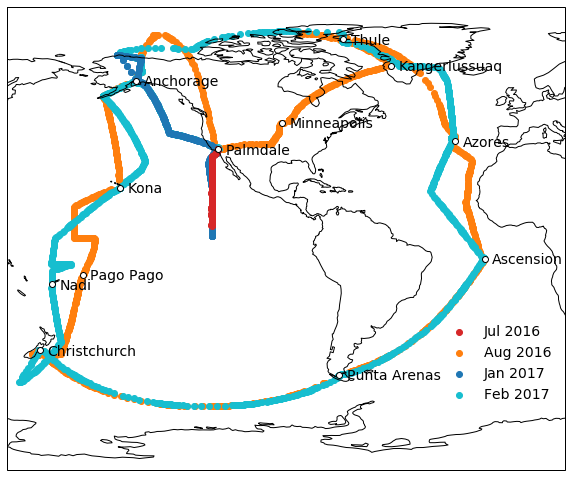

In [7]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-120)), facecolor='w')
ax.scatter(sample_lons_1607, sample_lats_1607, transform=ccrs.PlateCarree(), color='C3', marker='o', label='Jul 2016')
ax.scatter(sample_lons_1608, sample_lats_1608, transform=ccrs.PlateCarree(), color='C1', marker='o', label='Aug 2016')
ax.scatter(sample_lons_1701, sample_lats_1701, transform=ccrs.PlateCarree(), color='C0', marker='o', label='Jan 2017')
ax.scatter(sample_lons_1702, sample_lats_1702, transform=ccrs.PlateCarree(), color='C9', marker='o', label='Feb 2017')
ax.scatter(sample_lons_1701, sample_lats_1701, transform=ccrs.PlateCarree(), color='C0', marker='o')
ax.scatter(sample_lons_1607, sample_lats_1607, transform=ccrs.PlateCarree(), color='C3', marker='o')
ax.coastlines()
ax.set_extent([-200, 17, -90, 90], crs=ccrs.PlateCarree())
ax.legend(loc='center', bbox_to_anchor=(0.88,0.23), frameon=False, fontsize=14)
for i, j in atom_stops.items():
    ax.plot(j[1], j[0], **atom_stops_plt_kwargs)
    ax.text(j[1]+3, j[0]-2, i, **atom_stops_txt_kwargs)
if savefig: fig.savefig(path_to_figs / f'atom_flights.png', bbox_inches='tight', dpi=300)

#### Plot selected flight tracks with regions

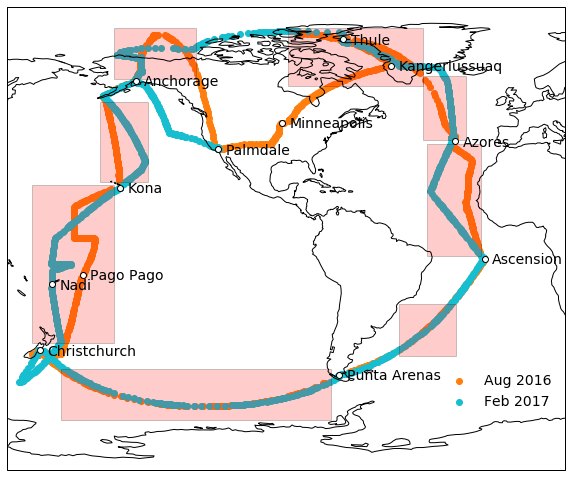

In [11]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-120)), facecolor='w')
# ax.scatter(sample_lons_1607, sample_lats_1607, transform=ccrs.PlateCarree(), color='C3', marker='o', label='Jul 2016')
ax.scatter(sample_lons_1608, sample_lats_1608, transform=ccrs.PlateCarree(), color='C1', marker='o', label='Aug 2016')
# ax.scatter(sample_lons_1701, sample_lats_1701, transform=ccrs.PlateCarree(), color='C0', marker='o', label='Jan 2017')
ax.scatter(sample_lons_1702, sample_lats_1702, transform=ccrs.PlateCarree(), color='C9', marker='o', label='Feb 2017')

kwargs_patch = dict(facecolor='r', alpha=0.2, edgecolor='k', transform=ccrs.PlateCarree())
ax.add_patch(mpatches.Rectangle(xy=[r1_llon, r1_llat], width=r1_ulon-r1_llon, height=r1_ulat-r1_llat, **kwargs_patch))
ax.add_patch(mpatches.Rectangle(xy=[r2_llon, r2_llat], width=r2_ulon-r2_llon, height=r2_ulat-r2_llat, **kwargs_patch))
ax.add_patch(mpatches.Rectangle(xy=[r3_llon, r3_llat], width=r3_ulon-r3_llon, height=r3_ulat-r3_llat, **kwargs_patch))
ax.add_patch(mpatches.Rectangle(xy=[r4_llon, r4_llat], width=r4_ulon-r4_llon, height=r4_ulat-r4_llat, **kwargs_patch))
ax.add_patch(mpatches.Rectangle(xy=[r5_llon, r5_llat], width=r5_ulon-r5_llon, height=r5_ulat-r5_llat, **kwargs_patch))
ax.add_patch(mpatches.Rectangle(xy=[r6_llon, r6_llat], width=r6_ulon-r6_llon, height=r6_ulat-r6_llat, **kwargs_patch))
ax.add_patch(mpatches.Rectangle(xy=[r7_llon, r7_llat], width=r7_ulon-r7_llon, height=r7_ulat-r7_llat, **kwargs_patch))
ax.add_patch(mpatches.Rectangle(xy=[r9_llon, r9_llat], width=r9_ulon-r9_llon, height=r9_ulat-r9_llat, **kwargs_patch))
ax.coastlines()
ax.set_extent([-200, 17, -90, 90], crs=ccrs.PlateCarree())
ax.legend(loc='center', bbox_to_anchor=(0.88,0.17), frameon=False, fontsize=14)
for i, j in atom_stops.items():
    ax.plot(j[1], j[0], **atom_stops_plt_kwargs)
    ax.text(j[1]+3, j[0]-2, i, **atom_stops_txt_kwargs)
if savefig: fig.savefig(path_to_figs / 'atom_flights_regions_1608_1702.png', bbox_inches='tight', dpi=300)

In [9]:
# def plot_region(lons, lats, points_within, ukca_llon, ukca_ulon, ukca_llat, ukca_ulat, llon, ulon, llat, ulat):
#     if (abs(llon) <= 180 <= abs(ulon)) or (abs(llon) >= 180 >= abs(ulon)):
#         projection = ccrs.PlateCarree(central_longitude=180)
#     else:
#         projection = ccrs.PlateCarree()
#     fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(projection=projection), facecolor='w')
#     ax.scatter(lons, lats, transform=ccrs.PlateCarree())
#     ax.scatter(lons[points_within], lats[points_within], color='r', transform=ccrs.PlateCarree())
#     ax.add_patch(mpatches.Rectangle(xy=[ukca_llon, ukca_llat], width=ukca_ulon-ukca_llon, height=ukca_ulat-ukca_llat, 
#                                     facecolor='b', alpha=0.2, transform=ccrs.PlateCarree()))
# #     ax.plot(grid_lons, grid_lats, color='b', alpha=0.7, transform=ccrs.PlateCarree())
# #     ax.plot(grid_lons.T, grid_lats.T, color='b', alpha=0.7, transform=ccrs.PlateCarree())
#     ax.coastlines()
#     ax.set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())
#     ax.gridlines(draw_labels=False)
    
# # plot_region(sample_lons, sample_lats, r1_points_within, r1_llon_ukca, r1_ulon_ukca, r1_llat, r1_ulat, -170, -140, 15, 60)
# # plot_region(sample_lons, sample_lats, r2_points_within, r2_llon_ukca, r2_ulon_ukca, r2_llat, r2_ulat, -200, -120, -50, 40)
# # plot_region(sample_lons, sample_lats, r3_points_within, r3_llon_ukca, r3_ulon_ukca, r3_llat, r3_ulat, -190, -60, -90, 0)
# # plot_region(sample_lons, sample_lats, r4_points_within, r4_llon_ukca, r4_ulon_ukca, r4_llat, r4_ulat, -80, 20, -60, 0)
# # plot_region(sample_lons, sample_lats, r5_points_within, r5_llon_ukca, r5_ulon_ukca, r5_llat, r5_ulat, -80, 20, -60, 60)
# # plot_region(sample_lons, sample_lats, r6_points_within, r6_llon_ukca, r6_ulon_ukca, r6_llat, r6_ulat, -80, 20, 0, 80)
# # plot_region(sample_lons, sample_lats, r7_points_within, r7_llon_ukca, r7_ulon_ukca, r7_llat, r7_ulat, -100, 0, 0, 90)
# # plot_region(sample_lons, sample_lats, r8_points_within, r8_llon_ukca, r8_ulon_ukca, r8_llat, r8_ulat, -140, -80, 20, 90)
# # plot_region(sample_lons, sample_lats, r9_points_within, r9_llon_ukca, r9_ulon_ukca, r9_llat, r9_ulat, -170, -80, 20, 90)